<a href="https://colab.research.google.com/github/basilsaju383/ML_project1/blob/main/anomaly_detection_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler


In [8]:
# Load data from Excel
data = pd.read_excel('/content/sample_data/mc-1N_GSM_values_1_month[1].xlsx')

In [9]:
data.columns

Index(['Day', 'Date', 'Time', 'Device Name', 'Location', 'GPS Location',
       'Aggregation', 'RSRP', 'RSRQ', 'RSSI', 'SNR'],
      dtype='object')

In [10]:
df = data['RSSI']
df = df.dropna()
df

277     -68.000000
292     -66.000000
308     -69.000000
323     -66.000000
338     -69.000000
           ...    
41372   -65.000000
41387   -66.000000
41402   -69.000000
41418   -68.000000
43201   -68.368594
Name: RSSI, Length: 1523, dtype: float64

In [15]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)


In [16]:
X_train = X_train.reshape((X_train.shape[0], 1))


In [17]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(X_train.shape[1])
])

model.compile(optimizer='adam', loss='mse')

In [18]:
model.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

Epoch 1/50
39/39 [==============================] - 1s 5ms/step - loss: 0.5446 - val_loss: 0.0625
Epoch 2/50
39/39 [==============================] - 0s 2ms/step - loss: 0.0705 - val_loss: 0.0129
Epoch 3/50
39/39 [==============================] - 0s 2ms/step - loss: 0.0469 - val_loss: 0.0050
Epoch 4/50
39/39 [==============================] - 0s 2ms/step - loss: 0.0410 - val_loss: 0.0047
Epoch 5/50
39/39 [==============================] - 0s 2ms/step - loss: 0.0322 - val_loss: 0.0065
Epoch 6/50
39/39 [==============================] - 0s 2ms/step - loss: 0.0303 - val_loss: 0.0135
Epoch 7/50
39/39 [==============================] - 0s 2ms/step - loss: 0.0278 - val_loss: 0.0097
Epoch 8/50
39/39 [==============================] - 0s 2ms/step - loss: 0.0262 - val_loss: 0.0134
Epoch 9/50
39/39 [==============================] - 0s 2ms/step - loss: 0.0215 - val_loss: 0.0118
Epoch 10/50
39/39 [==============================] - 0s 2ms/step - loss: 0.0230 - val_loss: 0.0216
Epoch 11/50
39/39 [

In [19]:
reconstructions = model.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

10/10 [==============================] - 0s 1ms/step


In [20]:
threshold = np.mean(mse) + 3 * np.std(mse)

In [21]:
anomalies = np.where(mse > threshold)[0]
print("Anomalies:", anomalies)

Anomalies: [ 59 131 150]


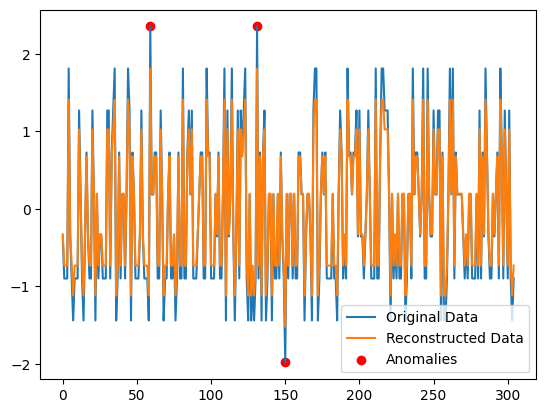

In [23]:
import matplotlib.pyplot as plt

plt.plot(X_test, label='Original Data')
plt.plot(reconstructions, label='Reconstructed Data')
plt.scatter(anomalies, X_test[anomalies], color='red', marker='o', label='Anomalies')
plt.legend()
plt.show()